<a href="https://colab.research.google.com/github/SaqlainHussainShah/PyOD/blob/master/CBLOF_on_Correlated_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
df = pd.read_csv("./JOIN.csv")

In [4]:
df.head()

,t_id,src_ip,src_port,dest_ip,dest_port,protocol,timestamp,flow_duration,total_fwd_packets,total_bwd_packets,total_length_of_fwd_packet,total_length_of_bwd_packet,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes_per_sec,flow_pkts_per_sec,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,flow_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,...,avg_packet_size,fwd_segment_size_avg,bwd_segment_size_avg,fwd_bytes_per_bulk_avg,fwd_packet_per_bulk_avg,fwd_bulk_rate_avg,bwd_bytes_per_bulk_avg,bwd_packet_per_bulk_avg,bwd_bulk_rate_avg,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,fwd_init_win_bytes,bwd_init_win_bytes,fwd_act_data_packets,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,gw_agent_id,a_id,agent_id,client_physical_ip,client_pseudo_ip,service_id,service_physical_ip,service_pseudo_ip,client_tx_bytes,service_tx_bytes,difference_bytes,createdAt,updatedAt,log_start_time,log_end_time
0,6,10.0.1.2,38204,10.0.1.5,443,6,25/11/2020 04:12:14 PM,350595,6,3,524,161,517,0,87.333333,210.511441,161,0,53.666667,92.953393,1953.821361,25.670646,43824.375,80137.673516,176904,175,350595,70119.0,95539.811032,178497,175,172125,86062.5,120066.024339,170962,1163,0,0,0,0,...,76.111111,87.333333,53.666667,0,0,0,0,0,0,0,58,0,17,64240,122,2,32,0.0,0.0,0,0,1.606303e+15,0.0,1.606303e+15,1.606303e+15,3000,281224,7238,39.53.123.30,10.0.1.2,706,192.168.3.100,10.0.1.5,69385,1960491,1891106,2020-11-26 00:44:07,2020-11-26 00:44:07,2020-11-25 15:45:37,2020-11-25 16:12:24
1,7,10.0.1.2,38206,10.0.1.5,443,6,25/11/2020 04:12:14 PM,350562,6,3,524,161,517,0,87.333333,210.511441,161,0,53.666667,92.953393,1954.005283,25.673062,43820.250,80384.458732,187452,446,350562,70112.4,95739.142454,187898,461,189511,94755.5,132513.932115,188457,1054,0,0,0,0,...,76.111111,87.333333,53.666667,0,0,0,0,0,0,0,58,0,17,64240,122,2,32,0.0,0.0,0,0,1.606303e+15,0.0,1.606303e+15,1.606303e+15,3000,281224,7238,39.53.123.30,10.0.1.2,706,192.168.3.100,10.0.1.5,69385,1960491,1891106,2020-11-26 00:44:07,2020-11-26 00:44:07,2020-11-25 15:45:37,2020-11-25 16:12:24
2,8,10.0.1.2,38208,10.0.1.5,443,6,25/11/2020 04:12:14 PM,350513,6,3,524,161,517,0,87.333333,210.511441,161,0,53.666667,92.953393,1954.278443,25.676651,43814.125,75615.978864,187532,378,350513,70102.6,88606.917756,187910,455,208182,104091.0,145565.001975,207021,1161,0,0,0,0,...,76.111111,87.333333,53.666667,0,0,0,0,0,0,0,58,0,17,64240,122,2,32,0.0,0.0,0,0,1.606303e+15,0.0,1.606303e+15,1.606303e+15,3000,281224,7238,39.53.123.30,10.0.1.2,706,192.168.3.100,10.0.1.5,69385,1960491,1891106,2020-11-26 00:44:07,2020-11-26 00:44:07,2020-11-25 15:45:37,2020-11-25 16:12:24
3,9,10.0.1.2,38210,10.0.1.5,443,6,25/11/2020 04:12:14 PM,351043,6,3,524,161,517,0,87.333333,210.511441,161,0,53.666667,92.953393,1951.327900,25.637885,43880.375,75299.927687,187404,388,351043,70208.6,88410.179568,187818,451,208946,104473.0,144959.718570,206975,1971,0,0,0,0,...,76.111111,87.333333,53.666667,0,0,0,0,0,0,0,58,0,17,64240,122,2,32,0.0,0.0,0,0,1.606303e+15,0.0,1.606303e+15,1.606303e+15,3000,281224,7238,39.53.123.30,10.0.1.2,706,192.168.3.100,10.0.1.5,69385,1960491,1891106,2020-11-26 00:44:07,2020-11-26 00:44:07,2020-11-25 15:45:37,2020-11-25 16:12:24
4,10,10.0.1.2,38212,10.0.1.5,443,6,25/11/2020 04:12:14 PM,517031,5,4,524,161,517,0,104.800000,230.446740,161,0,40.250000,80.500000,1324.872203,17.407080,64628.875,102897.117446,261742,293,515810,128952.5,118380.562567,263495,1789,516738,172246.0,148193.714293,264752,1320,0,0,0,0,...,76.111111,104.800000,40.250000,0,0,0,0,0,0,0,58,0,17,64240,122,2,32,0.0,0.0,0,0,1.606303e+15,0.0,1.606303e+15,1.606303e+15,3000,281224,7238,39.53.123.30,10.0.1.2,706,192.168.3.100,10.0.1.5,69385,19

In [5]:
df.groupby('agent_id').count()

,t_id,src_ip,src_port,dest_ip,dest_port,protocol,timestamp,flow_duration,total_fwd_packets,total_bwd_packets,total_length_of_fwd_packet,total_length_of_bwd_packet,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes_per_sec,flow_pkts_per_sec,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,flow_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,...,down_up_ratio,avg_packet_size,fwd_segment_size_avg,bwd_segment_size_avg,fwd_bytes_per_bulk_avg,fwd_packet_per_bulk_avg,fwd_bulk_rate_avg,bwd_bytes_per_bulk_avg,bwd_packet_per_bulk_avg,bwd_bulk_rate_avg,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,fwd_init_win_bytes,bwd_init_win_bytes,fwd_act_data_packets,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,gw_agent_id,a_id,client_physical_ip,client_pseudo_ip,service_id,service_physical_ip,service_pseudo_ip,client_tx_bytes,service_tx_bytes,difference_bytes,createdAt,updatedAt,log_start_time,log_end_time
agent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7085,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
7238,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
7423,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,...,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56
7427,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
7446,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


In [6]:
df_7423 = df[df['agent_id'] == 7423]

In [7]:
df_7423.head()

,t_id,src_ip,src_port,dest_ip,dest_port,protocol,timestamp,flow_duration,total_fwd_packets,total_bwd_packets,total_length_of_fwd_packet,total_length_of_bwd_packet,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes_per_sec,flow_pkts_per_sec,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,flow_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,...,avg_packet_size,fwd_segment_size_avg,bwd_segment_size_avg,fwd_bytes_per_bulk_avg,fwd_packet_per_bulk_avg,fwd_bulk_rate_avg,bwd_bytes_per_bulk_avg,bwd_packet_per_bulk_avg,bwd_bulk_rate_avg,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,fwd_init_win_bytes,bwd_init_win_bytes,fwd_act_data_packets,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,gw_agent_id,a_id,agent_id,client_physical_ip,client_pseudo_ip,service_id,service_physical_ip,service_pseudo_ip,client_tx_bytes,service_tx_bytes,difference_bytes,createdAt,updatedAt,log_start_time,log_end_time
16,32,10.0.10.130,57204,10.0.10.131,80,6,25/11/2020 05:40:03 PM,428139,5,2,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,16.349830,71356.500000,147125.245086,367942,18,428139,107034.750000,1.761532e+05,367942,152,18,18.000000,0.000000e+00,18,18,0,0,0,0,...,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,64240,28960,0,32,0.0,0.0,0,0,1.606308e+15,0.000000e+00,1.606308e+15,1.606308e+15,3000,283763,7423,10.52.61.8,10.0.10.130,700,192.168.3.1,10.0.10.131,97869,640011,542142,2020-11-26 02:44:09,2020-11-26 02:44:09,2020-11-25 16:59:40,2020-11-25 17:59:39
17,34,10.0.10.130,57206,10.0.10.131,80,6,25/11/2020 05:40:03 PM,461429,5,2,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,15.170265,76904.833333,160504.201091,401083,12,461429,115357.250000,1.925436e+05,401083,236,12,12.000000,0.000000e+00,12,12,0,0,0,0,...,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,64240,28960,0,32,0.0,0.0,0,0,1.606308e+15,0.000000e+00,1.606308e+15,1.606308e+15,3000,283763,7423,10.52.61.8,10.0.10.130,700,192.168.3.1,10.0.10.131,97869,640011,542142,2020-11-26 02:44:09,2020-11-26 02:44:09,2020-11-25 16:59:40,2020-11-25 17:59:39
18,35,10.0.10.130,57208,10.0.10.131,80,6,25/11/2020 05:40:03 PM,10692577,29,32,1768,33289,764,0,60.965517,187.184875,1448,0,1040.281250,610.463031,3278.629651,5.704892,178209.616667,886077.161698,5780422,2,10692577,381877.750000,1.295229e+06,5876089,103,6835489,220499.645161,1.037072e+06,5780422,2,0,0,0,0,...,574.704918,60.965517,1040.281250,0,0,0,34579,30,34725,0,28,0,545,64240,255,3,32,60636.0,0.0,60636,60636,8.031540e+14,1.135831e+15,1.606308e+15,5.780422e+06,3000,283763,7423,10.52.61.8,10.0.10.130,700,192.168.3.1,10.0.10.131,97869,640011,542142,2020-11-26 02:44:09,2020-11-26 02:44:09,2020-11-25 16:59:40,2020-11-25 17:59:39
19,36,10.0.10.130,57228,10.0.10.131,80,6,25/11/2020 05:40:09 PM,4719262,31,37,752,49401,752,0,24.258065,135.063187,1448,0,1335.162162,385.794671,10627.297234,14.409033,70436.746269,475043.073277,3855668,2,4719262,157308.733333,7.067223e+05,3855668,108,771393,21427.583333,1.171895e+05,703618,2,0,0,0,0,...,737.544118,24.258065,1335.162162,0,0,0,50153,36,735823,0,11,0,726,64240,238,1,32,0.0,0.0,0,0,1.606308e+15,0.000000e+00,1.606308e+15,1.606308e+15,3000,283763,7423,10.52.61.8,10.0.10.130,700,192.168.3.1,10.0.10.131,97869,640011,542142,2020-11-26 02:44:09,2020-11-26 02:44:09,2020-11-25 16:59:40,2020-11-25 17:59:39
20,37,10.0.10.130,57238,10.0.10.131,80,6,25/11/2020 05:40:10 PM,4001972,18,16,736,19110,736,0,40.888889,173.476864,1448,0,1194.375000,548.600750,4959.055186,8.495812,121271.878788,663161.864505,3814467,2,4001972,235410.117647,9.225392e+05,3814467,110,70792,4719.466667,1.105075e+04,39340,2,0,0,0,0,...,583.705882,40.888889,1194.375000,0,0,0,19846,15,384522,0,21,0,562,6

In [8]:
#Find correlation of features with eachother to remove highly correlated features for minimizing redundancy.
# Creating correlation matrix
cor_matrix = df_7423.corr().abs()


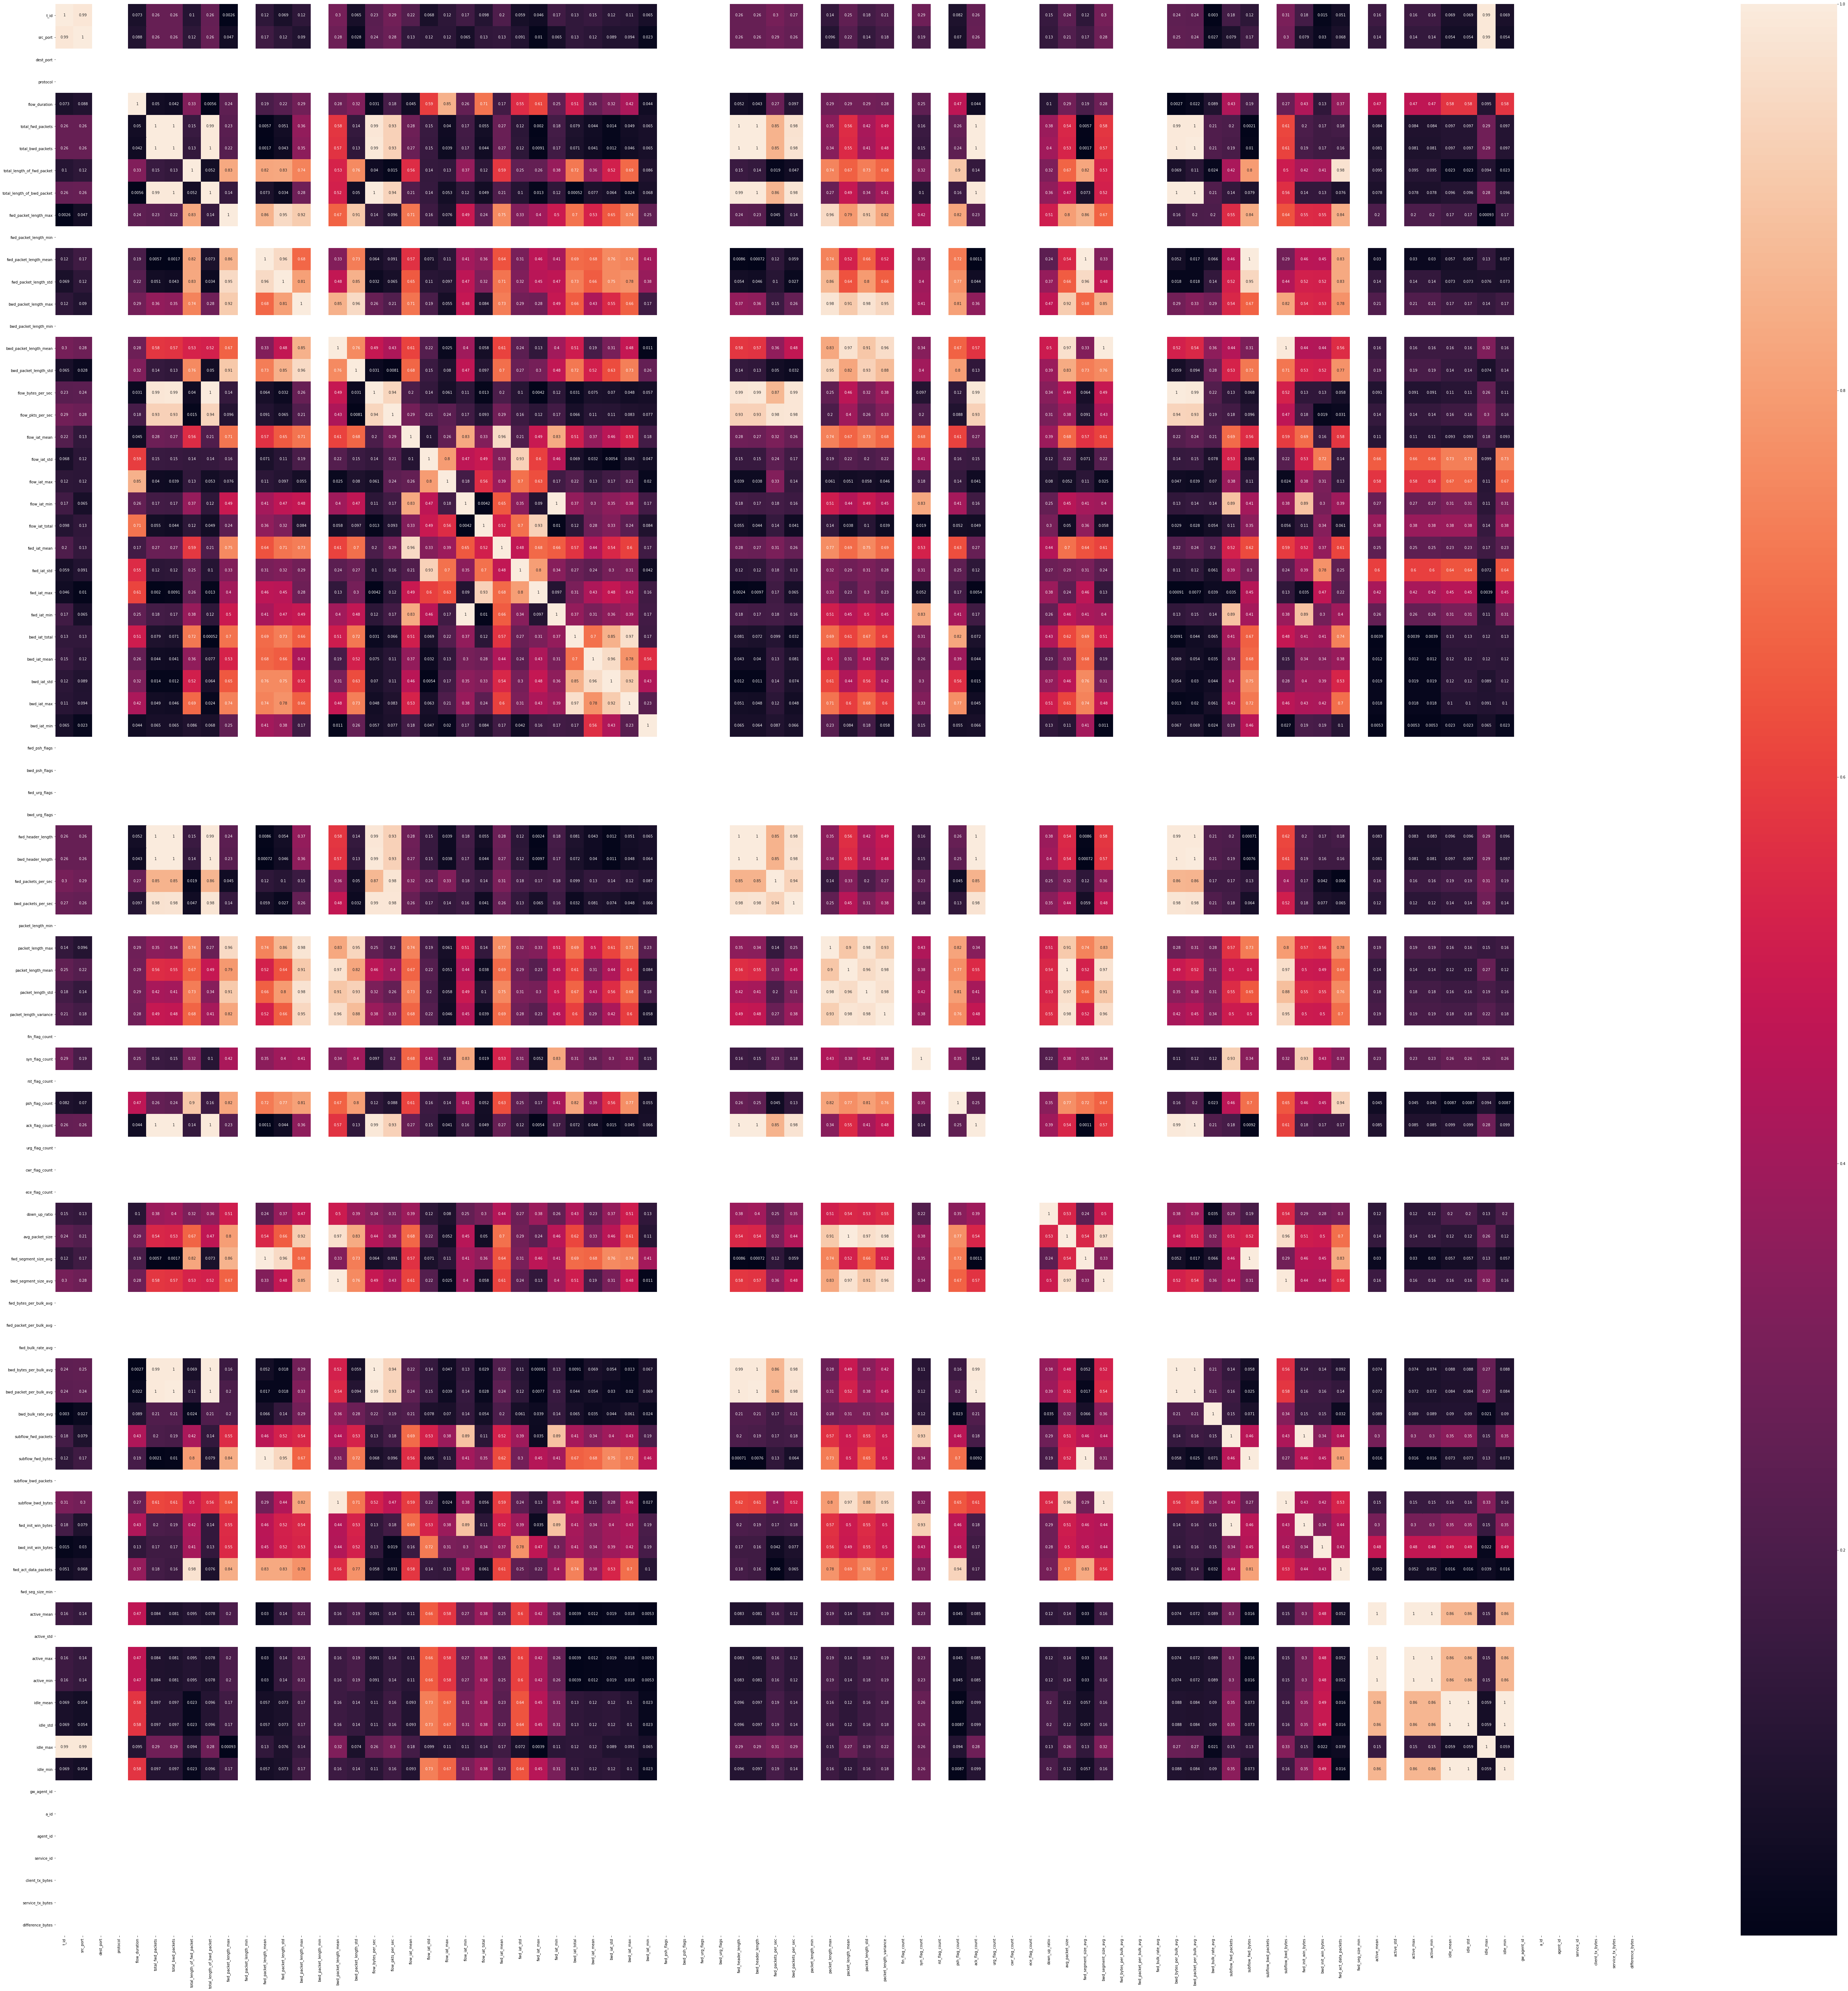

In [9]:
plt.figure(figsize = (98,98))
sn.heatmap(cor_matrix, annot=True)
plt.show()

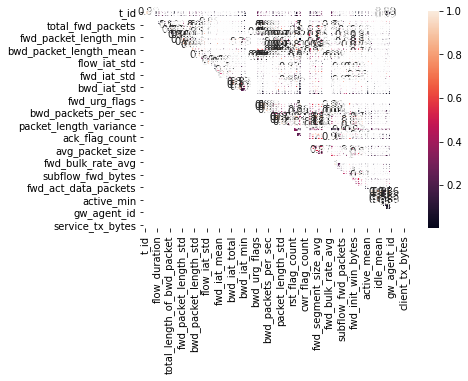

In [10]:
 #Selecting upper triangle of correlation matrix
 upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),
                                      k=1).astype(np.bool))
 sn.heatmap(upper_tri, annot=True)
 plt.show()

In [11]:
  # Finding index of feature columns with correlation greater than 0.95
  to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
  print(); print(to_drop)


['src_port', 'total_bwd_packets', 'total_length_of_bwd_packet', 'fwd_packet_length_std', 'bwd_packet_length_std', 'flow_bytes_per_sec', 'fwd_iat_mean', 'fwd_iat_min', 'bwd_iat_std', 'bwd_iat_max', 'fwd_header_length', 'bwd_header_length', 'fwd_packets_per_sec', 'bwd_packets_per_sec', 'packet_length_max', 'packet_length_mean', 'packet_length_std', 'packet_length_variance', 'ack_flag_count', 'avg_packet_size', 'fwd_segment_size_avg', 'bwd_segment_size_avg', 'bwd_bytes_per_bulk_avg', 'bwd_packet_per_bulk_avg', 'subflow_fwd_bytes', 'subflow_bwd_bytes', 'fwd_init_win_bytes', 'fwd_act_data_packets', 'active_max', 'active_min', 'idle_std', 'idle_max', 'idle_min']


In [12]:
cor_matrix

,t_id,src_port,dest_port,protocol,flow_duration,total_fwd_packets,total_bwd_packets,total_length_of_fwd_packet,total_length_of_bwd_packet,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes_per_sec,flow_pkts_per_sec,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,flow_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fwd_header_length,bwd_header_length,fwd_packets_per_sec,...,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,cwr_flag_count,ece_flag_count,down_up_ratio,avg_packet_size,fwd_segment_size_avg,bwd_segment_size_avg,fwd_bytes_per_bulk_avg,fwd_packet_per_bulk_avg,fwd_bulk_rate_avg,bwd_bytes_per_bulk_avg,bwd_packet_per_bulk_avg,bwd_bulk_rate_avg,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,fwd_init_win_bytes,bwd_init_win_bytes,fwd_act_data_packets,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,gw_agent_id,a_id,agent_id,service_id,client_tx_bytes,service_tx_bytes,difference_bytes
t_id,1.000000,0.985669,NaN,NaN,0.072917,0.262896,0.262255,0.101650,0.260406,0.002587,NaN,0.122218,0.068867,0.122536,NaN,0.298135,0.065050,0.234121,0.290520,0.218106,0.067640,0.118043,0.171100,0.097558,0.203648,0.059340,0.045689,0.170803,0.130822,0.147580,0.116393,0.109609,0.064668,NaN,NaN,NaN,NaN,0.263718,0.262452,0.304104,...,0.285150,NaN,0.081529,0.260574,NaN,NaN,NaN,0.148414,0.242099,0.122218,0.298135,NaN,NaN,NaN,0.242769,0.240740,0.003027,0.178567,0.120421,NaN,0.312069,0.178567,0.015287,0.050617,NaN,0.162784,NaN,0.162784,0.162784,0.068693,0.068693,0.991294,0.068693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
src_port,0.985669,1.000000,NaN,NaN,0.088116,0.263880,0.262864,0.119520,0.264382,0.047446,NaN,0.168079,0.118221,0.089909,NaN,0.279545,0.028272,0.236344,0.277399,0.131016,0.116868,0.116282,0.065175,0.127821,0.133615,0.090613,0.010140,0.064891,0.130747,0.117088,0.089265,0.093710,0.022944,NaN,NaN,NaN,NaN,0.264205,0.262648,0.285186,...,0.191830,NaN,0.070415,0.262125,NaN,NaN,NaN,0.133366,0.214091,0.168079,0.279545,NaN,NaN,NaN,0.246828,0.244361,0.026662,0.078848,0.167071,NaN,0.295419,0.078848,0.029914,0.067989,NaN,0.140557,NaN,0.140557,0.140557,0.053504,0.053504,0.989684,0.053504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dest_port,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
protocol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flow_duration,0.072917,0.088116,NaN,NaN,1.000000,0.049991,0.042118,0.327453,0.005633,0.243215,NaN,0.192220,0.223198,0.291347,NaN,0.279476,0.323662,0.031322,0.184372,0.045186,0.594917,0.850142,0.256367,0.708116,0.174347,0.554211,0.611747,0.252363,0.507601,0.259848,0.317575,0.422510,0.044418,NaN,NaN,NaN,NaN,0.051595,0.043055,0.269757,...,0.246298,NaN,0.467207,0.043805,NaN,NaN,NaN,0.102443,0.289613,0.192220,0.279476,NaN,NaN,NaN,0.002690,0.022340,0.089303,0.433629,0.185286,NaN,0.267715,0.433629,0.126170,0.371638,NaN,0.469179,NaN,0.469179,0.469179,0.576499,0.576499,0.095401,0.576499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [13]:
df['t_id'].corr(df['t_id'])

1.0

In [20]:
nan = df_7423['protocol'].corr(df_7423['protocol'])

In [72]:
not_nan_mask = ~df_7423.corr().isna().all()

In [73]:
not_nan_mask

t_id                 True
src_port             True
dest_port           False
protocol            False
flow_duration        True
                    ...  
agent_id            False
service_id          False
client_tx_bytes     False
service_tx_bytes    False
difference_bytes    False
Length: 87, dtype: bool

In [74]:
not_nan_columns = []
for column, valid in zip(df_7423.corr().columns, not_nan_mask):
  if valid == True:
    not_nan_columns.append(column)
  else:
    pass

In [75]:
not_nan_columns

['t_id',
 'src_port',
 'flow_duration',
 'total_fwd_packets',
 'total_bwd_packets',
 'total_length_of_fwd_packet',
 'total_length_of_bwd_packet',
 'fwd_packet_length_max',
 'fwd_packet_length_mean',
 'fwd_packet_length_std',
 'bwd_packet_length_max',
 'bwd_packet_length_mean',
 'bwd_packet_length_std',
 'flow_bytes_per_sec',
 'flow_pkts_per_sec',
 'flow_iat_mean',
 'flow_iat_std',
 'flow_iat_max',
 'flow_iat_min',
 'flow_iat_total',
 'fwd_iat_mean',
 'fwd_iat_std',
 'fwd_iat_max',
 'fwd_iat_min',
 'bwd_iat_total',
 'bwd_iat_mean',
 'bwd_iat_std',
 'bwd_iat_max',
 'bwd_iat_min',
 'fwd_header_length',
 'bwd_header_length',
 'fwd_packets_per_sec',
 'bwd_packets_per_sec',
 'packet_length_max',
 'packet_length_mean',
 'packet_length_std',
 'packet_length_variance',
 'syn_flag_count',
 'psh_flag_count',
 'ack_flag_count',
 'down_up_ratio',
 'avg_packet_size',
 'fwd_segment_size_avg',
 'bwd_segment_size_avg',
 'bwd_bytes_per_bulk_avg',
 'bwd_packet_per_bulk_avg',
 'bwd_bulk_rate_avg',
 'subfl

In [76]:
len(not_nan_columns)

60

In [78]:
df_not_nan = df_7423[not_nan_columns]

In [80]:
cor_matrix = df_not_nan.corr()

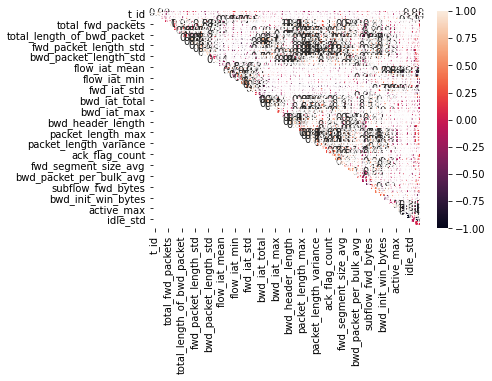

In [81]:
 #Selecting upper triangle of correlation matrix
 upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),
                                      k=1).astype(np.bool))
 sn.heatmap(upper_tri, annot=True)
 plt.show()

In [83]:
upper_tri

,t_id,src_port,flow_duration,total_fwd_packets,total_bwd_packets,total_length_of_fwd_packet,total_length_of_bwd_packet,fwd_packet_length_max,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes_per_sec,flow_pkts_per_sec,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,flow_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_header_length,bwd_header_length,fwd_packets_per_sec,bwd_packets_per_sec,packet_length_max,packet_length_mean,packet_length_std,packet_length_variance,syn_flag_count,psh_flag_count,ack_flag_count,down_up_ratio,avg_packet_size,fwd_segment_size_avg,bwd_segment_size_avg,bwd_bytes_per_bulk_avg,bwd_packet_per_bulk_avg,bwd_bulk_rate_avg,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_bytes,fwd_init_win_bytes,bwd_init_win_bytes,fwd_act_data_packets,active_mean,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
t_id,NaN,0.985669,-0.072917,-0.262896,-0.262255,0.101650,-0.260406,0.002587,0.122218,0.068867,-0.122536,-0.298135,-0.065050,-0.234121,-0.290520,0.218106,0.067640,0.118043,0.171100,-0.097558,0.203648,0.059340,0.045689,0.170803,-0.130822,-0.147580,-0.116393,-0.109609,-0.064668,-0.263718,-0.262452,-0.304104,-0.268241,-0.135942,-0.246541,-0.176376,-0.206367,-0.285150,-0.081529,-0.260574,-0.148414,-0.242099,0.122218,-0.298135,-0.242769,-0.240740,0.003027,0.178567,0.120421,-0.312069,-0.178567,-0.015287,0.050617,-0.162784,-0.162784,-0.162784,0.068693,-0.068693,0.991294,0.068693
src_port,NaN,NaN,-0.088116,-0.263880,-0.262864,0.119520,-0.264382,0.047446,0.168079,0.118221,-0.089909,-0.279545,-0.028272,-0.236344,-0.277399,0.131016,0.116868,0.116282,0.065175,-0.127821,0.133615,0.090613,0.010140,0.064891,-0.130747,-0.117088,-0.089265,-0.093710,-0.022944,-0.264205,-0.262648,-0.285186,-0.261095,-0.096215,-0.220323,-0.140061,-0.179795,-0.191830,-0.070415,-0.262125,-0.133366,-0.214091,0.168079,-0.279545,-0.246828,-0.244361,0.026662,0.078848,0.167071,-0.295419,-0.078848,0.029914,0.067989,-0.140557,-0.140557,-0.140557,0.053504,-0.053504,0.989684,0.053504
flow_duration,NaN,NaN,NaN,0.049991,0.042118,0.327453,0.005633,0.243215,0.192220,0.223198,0.291347,0.279476,0.323662,-0.031322,-0.184372,0.045186,0.594917,0.850142,-0.256367,0.708116,0.174347,0.554211,0.611747,-0.252363,0.507601,0.259848,0.317575,0.422510,0.044418,0.051595,0.043055,-0.269757,-0.096651,0.285283,0.290338,0.290577,0.284049,0.246298,0.467207,0.043805,0.102443,0.289613,0.192220,0.279476,0.002690,0.022340,-0.089303,-0.433629,0.185286,0.267715,0.433629,0.126170,0.371638,0.469179,0.469179,0.469179,-0.576499,0.576499,-0.095401,-0.576499
total_fwd_packets,NaN,NaN,NaN,NaN,0.999293,0.151570,0.993759,0.232870,0.005697,0.050854,0.364771,0.579981,0.137446,0.988214,0.931558,-0.280366,-0.150000,-0.040221,-0.174581,0.054799,-0.273193,-0.116617,-0.002027,-0.176704,0.079410,-0.043861,-0.013642,0.049339,-0.065415,0.999977,0.999321,0.853752,0.976455,0.350390,0.556684,0.417951,0.485753,0.156262,0.261294,0.999726,0.383375,0.542406,0.005697,0.579981,0.992916,0.995391,0.210548,-0.195729,-0.002093,0.613482,0.195729,-0.166739,0.179000,-0.084244,-0.084244,-0.084244,0.097150,-0.097150,-0.287655,0.097150
total_bwd_packets,NaN,NaN,NaN,NaN,NaN,0.134839,0.995701,0.224978,-0.001704,0.043319,0.354904,0.571696,0.125564,0.990532,0.932360,-0.272028,-0.147526,-0.038602,-0.168479,0.044191,-0.267060,-0.118617,-0.009130,-0.170550,0.070938,-0.040748,-0.012371,0.045988,-0.064658,0.999214,0.999988,0.853803,0.977951,0.342163,0.548943,0.409563,0.477145,0.147717,0.243138,0.999848,0.400788,0.534715,-0.001704,0.571696,0.995348,0.997284,0.209834,-0.188887,-0.009955,0.607311,0.188887,-0.166236,0.162205,-0.081490,-0.081490,-0.081490,0.097202,-0.097202,-0.285846,0.097202
total_length_of_fwd_packet,NaN,NaN,NaN,NaN,NaN,NaN,0.051855,0.829534,0.823852,0.825388,0.739241,0.530674,0.755720,0.040300,0.015101,-0.555261,-0.138991,0.129679,-0.373664,-0.121349,-0.585168,-0

In [82]:
  # Finding index of feature columns with correlation greater than 0.95
  to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
  print(); print(to_drop)


['src_port', 'total_bwd_packets', 'total_length_of_bwd_packet', 'fwd_packet_length_std', 'bwd_packet_length_std', 'flow_bytes_per_sec', 'fwd_iat_mean', 'fwd_iat_min', 'bwd_iat_std', 'bwd_iat_max', 'fwd_header_length', 'bwd_header_length', 'fwd_packets_per_sec', 'bwd_packets_per_sec', 'packet_length_max', 'packet_length_mean', 'packet_length_std', 'packet_length_variance', 'ack_flag_count', 'avg_packet_size', 'fwd_segment_size_avg', 'bwd_segment_size_avg', 'bwd_bytes_per_bulk_avg', 'bwd_packet_per_bulk_avg', 'subflow_fwd_bytes', 'subflow_bwd_bytes', 'fwd_act_data_packets', 'active_max', 'active_min', 'idle_max', 'idle_min']


In [92]:
df_corr_clean = df_not_nan.drop(df_not_nan[to_drop], axis = 1 )

In [93]:
df_corr_clean.head()

,t_id,flow_duration,total_fwd_packets,total_length_of_fwd_packet,fwd_packet_length_max,fwd_packet_length_mean,bwd_packet_length_max,bwd_packet_length_mean,flow_pkts_per_sec,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,flow_iat_total,fwd_iat_std,fwd_iat_max,bwd_iat_total,bwd_iat_mean,bwd_iat_min,syn_flag_count,psh_flag_count,down_up_ratio,bwd_bulk_rate_avg,subflow_fwd_packets,fwd_init_win_bytes,bwd_init_win_bytes,active_mean,idle_mean,idle_std
16,32,428139,5,0,0,0.000000,0,0.000000,16.349830,71356.500000,147125.245086,367942,18,428139,1.761532e+05,367942,18,18.000000,18,4,0,0,0,0,64240,28960,0.0,1.606308e+15,0.000000e+00
17,34,461429,5,0,0,0.000000,0,0.000000,15.170265,76904.833333,160504.201091,401083,12,461429,1.925436e+05,401083,12,12.000000,12,4,0,0,0,0,64240,28960,0.0,1.606308e+15,0.000000e+00
18,35,10692577,29,1768,764,60.965517,1448,1040.281250,5.704892,178209.616667,886077.161698,5780422,2,10692577,1.295229e+06,5876089,6835489,220499.645161,2,2,10,1,34725,0,64240,255,60636.0,8.031540e+14,1.135831e+15
19,36,4719262,31,752,752,24.258065,1448,1335.162162,14.409033,70436.746269,475043.073277,3855668,2,4719262,7.067223e+05,3855668,771393,21427.583333,2,2,2,1,735823,0,64240,238,0.0,1.606308e+15,0.000000e+00
20,37,4001972,18,736,736,40.888889,1448,1194.375000,8.495812,121271.878788,663161.864505,3814467,2,4001972,9.225392e+05,3814467,70792,4719.466667,2,2,2,0,384522,0,64240,238,0.0,1.606308e+15,0.000000e+00


In [95]:
len(df_corr_clean.columns)

29

In [186]:
# Formula 

# x−median(x) / MAD(x)  WHERE  MAD(x)  = median(|x − median(x)|) 

def median_normalization(df_column):

  median_value = df_column.median()
  # print("median", median_value)
  x_minus_median = df_column - median_value
  # print("x minus median" , x_minus_median)
  # print("len x minus median", len(x_minus_median))
  mad = x_minus_median.abs().median()
  # print("mad", mad)
  # print("x_minus_median.abs()", x_minus_median.abs())
  normalized_value = x_minus_median/mad
  # print("normalized", normalized_value)
  # mad = ((df_column- df_column.median()).abs()).median()
  # x_minus_median = df_column - df_column.median()
  # print("median value",  df_column.median())
  # print("mad value", mad.median())
  # print("x minus med", x_minus_median)
  # normalized_value = (x_minus_median) / mad
  # print("normalized_value", normalized_value)
  # print(normalized_value)
  return normalized_value


def normalize_data(dataframe):
  df = pd.DataFrame(columns = dataframe.columns)
  for column in dataframe.columns:
    # print(column)
    # if column == 'flow_duration':
    df[column] = median_normalization(dataframe[column])
      # print(median_normalization(dataframe[column]))
      # print(df[column])

  return df


In [187]:
df_normalized = normalize_data(df_corr_clean)

In [188]:
df_normalized

,t_id,flow_duration,total_fwd_packets,total_length_of_fwd_packet,fwd_packet_length_max,fwd_packet_length_mean,bwd_packet_length_max,bwd_packet_length_mean,flow_pkts_per_sec,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,flow_iat_total,fwd_iat_std,fwd_iat_max,bwd_iat_total,bwd_iat_mean,bwd_iat_min,syn_flag_count,psh_flag_count,down_up_ratio,bwd_bulk_rate_avg,subflow_fwd_packets,fwd_init_win_bytes,bwd_init_win_bytes,active_mean,idle_mean,idle_std
16,-2.233333,-3.468310,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,8.262150,-0.998934,-1.008689,-4.738002,-0.954876,-1.179215,0.299590,-1.610324,-0.993953,-0.965747,8.0,inf,-1.0,NaN,NaN,NaN,NaN,182.828025,NaN,-1.085399e+00,NaN
17,-2.100000,-3.443172,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,7.573849,-0.986067,-0.991311,-4.701720,-0.972344,-1.167829,0.420511,-1.594315,-0.995968,-0.977165,5.0,inf,-1.0,NaN,NaN,NaN,NaN,182.828025,NaN,-1.085396e+00,NaN
18,-2.033333,4.282495,8.000000,3.804348,1.076087,32.619507,6.784946,14.022112,2.050608,-0.751145,-0.048877,1.187521,-1.001456,2.331307,8.555690,1.050475,2295.485470,418.599705,0.0,NaN,9.0,inf,inf,NaN,NaN,-0.006369,inf,-1.136272e+07,inf
19,-1.966667,-0.228030,8.666667,1.043478,1.043478,12.377138,6.784946,18.280320,7.129654,-1.001066,-0.582762,-0.919678,-1.001456,0.288384,4.213920,0.074478,258.161095,39.775611,0.0,NaN,1.0,inf,inf,NaN,NaN,-0.114650,NaN,-9.991025e-01,NaN
20,-1.900000,-0.769664,4.333333,1.000000,1.000000,21.548226,6.784946,16.247292,3.679167,-0.883182,-0.338418,-0.964784,-1.001456,0.043065,5.806132,0.054575,22.783639,7.980907,0.0,NaN,1.0,NaN,inf,NaN,NaN,-0.114650,NaN,-9.889524e-01,NaN
21,-1.833333,-0.769380,68.000000,1.059783,1.059783,1.000000,6.784946,19.684296,64.183439,-1.143689,-0.978686,-1.196880,-1.010189,0.043194,0.842607,-0.047835,111.330254,1.662147,-0.5,NaN,3.0,inf,inf,NaN,NaN,-0.108280,NaN,-9.889562e-01,NaN
22,-1.633333,2.532403,-0.666667,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999615,5.309296,5.026507,3.975177,0.270742,1.538649,42.186997,2.234290,-1.000000,-1.000000,-1.0,NaN,-1.0,NaN,NaN,NaN,NaN,182.828025,inf,-1.136272e+07,inf
23,-1.566667,2.539509,3.666667,6.649457,2.070652,96.020943,6.784946,7.940691,0.809583,-0.493961,-0.026019,-0.464643,-1.001456,1.541868,7.976431,0.275258,2030.918696,884.311571,0.0,NaN,8.0,NaN,inf,NaN,NaN,0.133758,NaN,-7.734792e-01,NaN
24,-1.500000,2.155629,6.666667,6.388587,1.592391,58.975831,6.784946,14.283001,2.277951,-0.775810,-0.348453,-1.115970,-1.001456,1.368000,5.618951,-0.012134,1407.860407,361.725802,0.0,NaN,9.0,NaN,inf,NaN,NaN,0.095541,NaN,-6.248780e-01,NaN
25,-1.433333,2.155685,0.000000,1.279891,1.279891,91.533509,5.709677,5.007220,-0.685609,1.444765,1.260431,-0.601289,0.279476,1.368025,15.430535,0.214964,1408.984210,3992.166508,504.0,NaN,1.0,NaN,NaN,NaN,NaN,-0.101911,NaN,-6.248565e-01,NaN


In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
np.random.seed(42)

# Generate train data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

In [ ]:
print(X_inliers)

In [ ]:
# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]
print(X_outliers)

In [ ]:
n_outliers = len(X_outliers)
print(n_outliers)
ground_truth = np.ones(len(X), dtype=int)
print(ground_truth)
ground_truth[-n_outliers:] = -1
print(ground_truth)

In [ ]:
# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X)
print(y_pred)
n_errors = (y_pred != ground_truth).sum()
print(n_errors)
X_scores = clf.negative_outlier_factor_
print(X_scores)

In [ ]:
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()